<a href="https://colab.research.google.com/github/palberth/Mineria-de-Datos-MASDI/blob/main/Actividad_1_S3_An%C3%A1lisis_Dataset_Edad_Peso_Altura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo presentado por Albert Páez Lobo y Katherin Torrado Claro**

#Primero las bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# verificar si estamos en google colab
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

In [ ]:
IN_COLAB

True

In [ ]:
import os
# Obtener el directorio raíz del proyecto
dir_root = os.path.dirname(os.getcwd())
dir_root

'/'

In [ ]:
import pandas as pd

# Cargar el archivo CSV y mostrar las primeras filas para revisar su estructura

# Intentar cargar el archivo con una codificación alternativa (ISO-8859-1)
df = pd.read_csv("/content/Base_Datos.csv", on_bad_lines='skip', encoding='latin-1')

# Mostrar las primeras filas y la información general del dataset
df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Persona     49 non-null     int64  
 1   Edad(Años)  49 non-null     int64  
 2   Peso(Kg)    49 non-null     float64
 3   Altura(cm)  49 non-null     float64
 4   Sexo        49 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 2.0+ KB


(   Persona  Edad(Años)  Peso(Kg)  Altura(cm) Sexo
 0        1          62      57.8       157.2    M
 1        2          53      51.0       159.0    M
 2        3          41      51.0       157.0    F
 3        4          49      63.0       172.0    M
 4        5          49      47.5       157.6    F,
 None)

## **Analisis Inicial**


---


El archivo contiene 49 registros con las siguientes columnas:

* Persona: Identificador único.
* Edad(Años): Edad en años.
* Peso(Kg): Peso en kilogramos.
* Altura(cm): Altura en centímetros.
* Sexo: Género (M para masculino, F para femenino).

Se generan los gráficos para el análisis de correlaciones

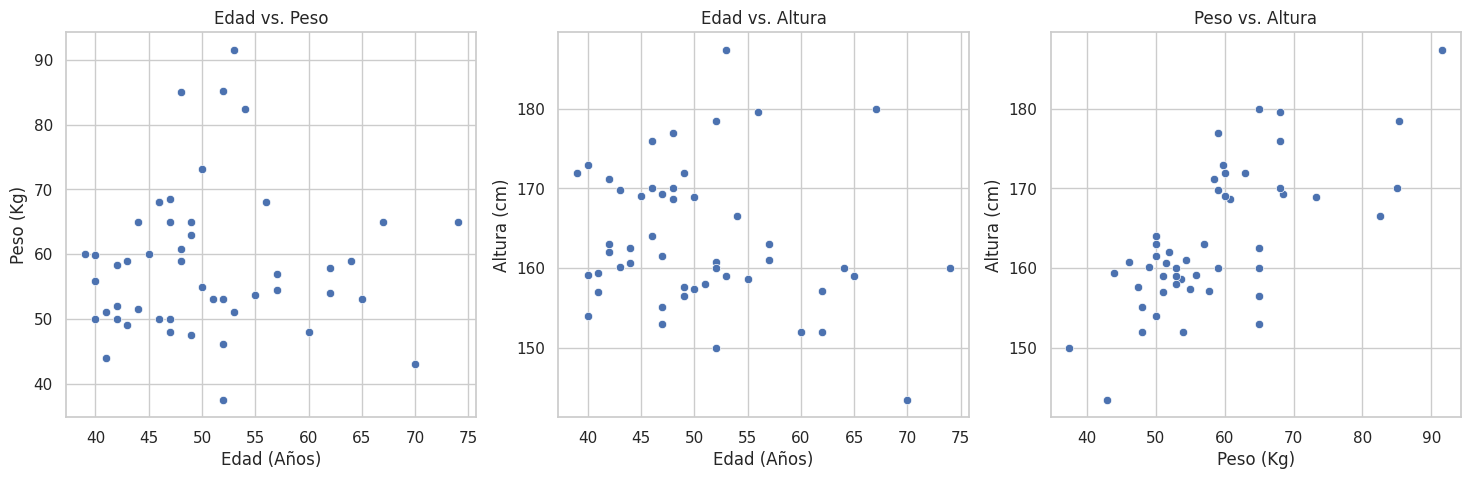

,Edad(Años),Peso(Kg),Altura(cm)
Edad(Años),1.000000,0.047952,-0.182663
Peso(Kg),0.047952,1.000000,0.706547
Altura(cm),-0.182663,0.706547,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear la figura y los ejes para los gráficos de dispersión
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gráfico de dispersión: Edad vs. Peso
sns.scatterplot(x=df["Edad(Años)"], y=df["Peso(Kg)"], ax=axes[0])
axes[0].set_title("Edad vs. Peso")
axes[0].set_xlabel("Edad (Años)")
axes[0].set_ylabel("Peso (Kg)")

# Gráfico de dispersión: Edad vs. Altura
sns.scatterplot(x=df["Edad(Años)"], y=df["Altura(cm)"], ax=axes[1])
axes[1].set_title("Edad vs. Altura")
axes[1].set_xlabel("Edad (Años)")
axes[1].set_ylabel("Altura (cm)")

# Gráfico de dispersión: Peso vs. Altura
sns.scatterplot(x=df["Peso(Kg)"], y=df["Altura(cm)"], ax=axes[2])
axes[2].set_title("Peso vs. Altura")
axes[2].set_xlabel("Peso (Kg)")
axes[2].set_ylabel("Altura (cm)")

# Guardar los gráficos
scatter_plot_path = "/content/scatter_plots.png"
plt.savefig(scatter_plot_path)
plt.show()

# Calcular correlaciones entre variables
correlations = df[["Edad(Años)", "Peso(Kg)", "Altura(cm)"]].corr()
correlations


## **Análisis de correlaciones:**


---


* **Edad vs. Peso:** Correlación muy baja (0.0479), lo que indica que no hay una relación significativa entre estas variables.

* **Edad vs. Altura:** Correlación negativa moderada (-0.1827), sugiriendo que la altura tiende a disminuir levemente con la edad, pero no de manera fuerte.

* **Peso vs. Altura:** Correlación alta (0.7065), indicando que a mayor altura, mayor peso.

En la gráfica de dispersión Edad vs. Peso, no se observa una tendencia clara. Los puntos están dispersos sin seguir un patrón específico, lo que sugiere que no hay una relación lineal entre la edad y el peso en esta muestra. Esto podría indicar que otros factores, como la dieta, el estilo de vida o la genética, tienen un mayor impacto en el peso que la edad.

Aspectos a tener en cuenta:

La falta de una tendencia clara en esta gráfica sugiere que la edad no es un predictor confiable del peso en esta población. Esto refuerza la idea de que el peso está influenciado por múltiples factores, y no solo por la edad.

## **Gráfico Circular Distribución de Sexo**

El gráfico circular muestra la distribución de hombres y mujeres en la base de datos. En este caso, la distribución es bastante equilibrada, con un porcentaje cercano al 50% para cada género. Esto indica que la muestra está bien balanceada en términos de género, lo que es importante para asegurar que los análisis no estén sesgados hacia un género en particular.

Aspectos a tener en cuenta:

La distribución equitativa de género en la base de datos es un aspecto positivo, ya que permite realizar análisis más generalizables. Sin embargo, es importante considerar que en otros contextos o poblaciones, la distribución podría no ser tan equilibrada, lo que podría afectar los resultados de los análisis.

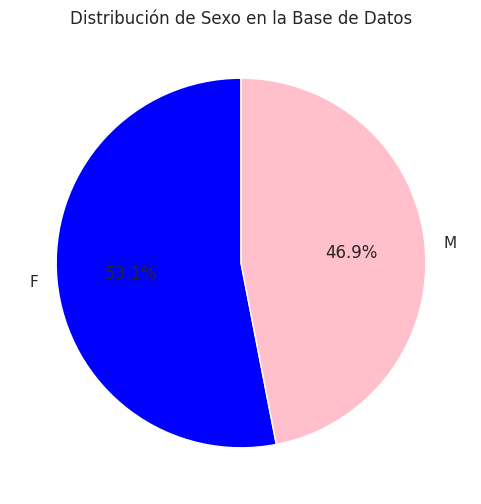

In [ ]:
# Crear gráfico circular para distribución por sexo
gender_counts = df["Sexo"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", colors=["blue", "pink"], startangle=90)
plt.title("Distribución de Sexo en la Base de Datos")

# Guardar el gráfico
pie_chart_path = "/content/gender_distribution.png"
plt.savefig(pie_chart_path)
plt.show()


## **Gráfico de Barras 10 primeras personas y sus edades**

El gráfico de barras horizontal muestra la edad de las 10 primeras personas en la base de datos. Las edades varían entre 40 y 62 años, con una distribución relativamente uniforme. No se observa una concentración particular en ningún rango de edad, lo que indica que las edades están distribuidas de manera bastante equitativa en esta submuestra.

Aspectos a tener en cuenta:

Este gráfico confirma que la muestra inicial es diversa en términos de edad, lo que es beneficioso para los análisis posteriores. La ausencia de una concentración en un rango de edad específico sugiere que los resultados podrían ser representativos de una población más amplia.

<ipython-input-70-4e0bd12ed6a7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_10_ages["Persona"], x=top_10_ages["Edad(Años)"], orient="h", palette="viridis")


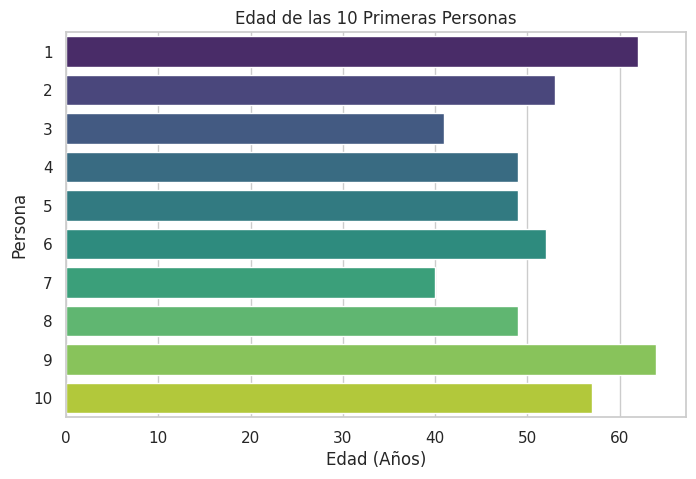

In [ ]:
# Seleccionar las primeras 10 personas y sus edades
top_10_ages = df.head(10)[["Persona", "Edad(Años)"]]

# Crear gráfico de barras horizontal
plt.figure(figsize=(8, 5))
sns.barplot(y=top_10_ages["Persona"], x=top_10_ages["Edad(Años)"], orient="h", palette="viridis")
plt.xlabel("Edad (Años)")
plt.ylabel("Persona")
plt.title("Edad de las 10 Primeras Personas")

# Guardar el gráfico
bar_chart_path = "/content/top_10_ages.png"
plt.savefig(bar_chart_path)
plt.show()


## **Conclusión**

El análisis de los datos en el dataset revela que no hay una correlación significativa entre la edad y el peso, ni entre la edad y la altura. Sin embargo, se observa una ligera correlación positiva entre el peso y la altura. La distribución de género es equilibrada, y no se observan tendencias claras en la relación entre la edad y el peso. Finalmente, la distribución de edades en la muestra inicial es diversa, lo que sugiere que los resultados podrían ser generalizables a una población más amplia.